# Pós de IA - módulo Fundamentos
# Prof. Tatiana Tavares
# Entrega 19/Março/2021
# em dupla

# Exercício de Aprendizagem Não Supervisionada

Esse trabalho visa utilizar técnicas de aprendizagem não-supervisionada para detectar se um paciente tem ou não doença cardíaca.

## Os dados
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

O *data set* utilizado foi o [Heart Disease UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Diseas) da UCI. Ele é um arquivo *.csv* com 303 amostras e 14 atributos. Os atributos são:

> 1. age - Idade em anos 
> 2. sex - Sexo do paciente 
>> 1: homem -  0: mulher
> 3. cp (chest pain type) - tipo de dor no peito (4 valores)
>> 1: typical angina  - 2: atypical angina - 3: non-anginal pain - 4: asymptomatic 
> 4. trestbps - pressão sanguínea em repouso (em mmHg no momento de admissão no hospital) 
> 5. chol - Colesterol no soro (em mg/dl) 
> 6. fbs - Glicose em jejum > 120 mg/dl
>> 1: true - 0: false
> 7. restecg - resultados do eletrocardiografo (3 valores):
>> 0: normal - 1: ST-T wave abnormality - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
> 8. thalach - Máxima taxa cardíaca atingida 
> 9. exang - Angina induzida por exercício 
>> 1: sim - 0: não
> 10. oldpeak - depressão ST unduzida por exercício relativo ao repouso 
> 11.slope - Inclinação do pico do segmento ST de exercício
> 12. ca - Número de veias principais coloridas por flourosopy (3 valores)
> 13. thal - Doença sanguinea thalassemia: 
>> 3: normal - 6: fixed defect - 7: reversable defect
> 14. Target - o label da classificação, se tem ou não doença cardíaca
>> 1: sim - 0: não

### Visualizando e limpando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
# Verificando se há valores nulos no dataframe
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [4]:
# Verificando número de amostras e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [5]:
# Verificando os labels
df.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

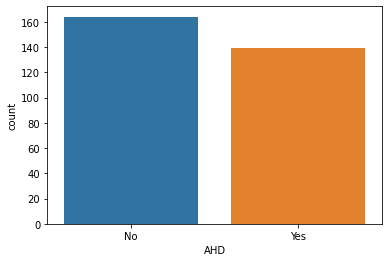

In [6]:
sns.countplot(x="AHD", data=df)
plt.show()

### Variáveis categóricas

As variáveis cp (dor no peito), restecg (resultados do eletrocardiografo), ca, thal, slope são variáveis categóricas e, portanto, devem ser transformadas em vetores numéricos para serem utilizadas como entrada nos algoritmos de *machine learning*. Para isso, elas são transformadas em vetores *one-hot* e novas colunas são criadas na tabela.

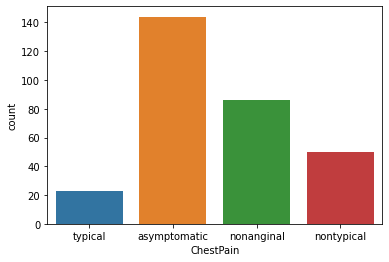

In [7]:
sns.countplot(x="ChestPain", data=df)
plt.show()

In [8]:
# Separando a coluna de label
X = df.drop(columns=['AHD','Unnamed: 0'])
y = df['AHD']

In [9]:
# Transformando variáveis categóricas em vetores e acrescentando as novas colunas na tabela
a = pd.get_dummies(df["ChestPain"],prefix="ChestPain")
b = pd.get_dummies(df["RestECG"],prefix="RestECG")
c = pd.get_dummies(df["Ca"],prefix="Ca")
d = pd.get_dummies(df["Thal"],prefix="Thal")
e = pd.get_dummies(df["Slope"],prefix="Slope")
                   
frames = [X, a, b, c, d, e]
X = pd.concat(frames, axis = 1)
X = X.drop(columns = ['Ca', 'ChestPain', 'Thal', 'Slope', 'RestECG'])

In [10]:
X.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'ExAng', 'Oldpeak',
       'ChestPain_asymptomatic', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'RestECG_0', 'RestECG_1',
       'RestECG_2', 'Ca_0.0', 'Ca_1.0', 'Ca_2.0', 'Ca_3.0', 'Thal_fixed',
       'Thal_normal', 'Thal_reversable', 'Slope_1', 'Slope_2', 'Slope_3'],
      dtype='object')

In [11]:
X.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,ChestPain_asymptomatic,ChestPain_nonanginal,...,Ca_0.0,Ca_1.0,Ca_2.0,Ca_3.0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,0,1,0,0,0,0,1
1,67,1,160,286,0,108,1,1.5,1,0,...,0,0,0,1,0,1,0,0,1,0
2,67,1,120,229,0,129,1,2.6,1,0,...,0,0,1,0,0,0,1,0,1,0
3,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,0,0,0,1
4,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,1,0,0


In [12]:
# Normalização dos dados para que todas as entradas fiquem entre 0 e 1
original = X.copy()
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,ChestPain_asymptomatic,ChestPain_nonanginal,...,Ca_0.0,Ca_1.0,Ca_2.0,Ca_3.0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.791667,1.0,0.622642,0.365297,0.0,0.282443,1.0,0.241935,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.791667,1.0,0.245283,0.235160,0.0,0.442748,1.0,0.419355,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:
original.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,ChestPain_asymptomatic,ChestPain_nonanginal,...,Ca_0.0,Ca_1.0,Ca_2.0,Ca_3.0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,0,1,0,0,0,0,1
1,67,1,160,286,0,108,1,1.5,1,0,...,0,0,0,1,0,1,0,0,1,0
2,67,1,120,229,0,129,1,2.6,1,0,...,0,0,1,0,0,0,1,0,1,0
3,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,0,0,0,1
4,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,1,0,0


In [14]:
y = y.drop(columns = ['AHD'])

In [15]:
print(X.shape)
print(y.shape)

(303, 25)
(303,)


## Model0: K-means

In [16]:
from sklearn.cluster import KMeans

In [17]:
import os
import os.path as path
import warnings
import pickle as pck

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from mpl_toolkits.mplot3d import Axes3D

import pickle
import time
from tempfile import TemporaryFile

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.text import TSNEVisualizer

warnings.filterwarnings("ignore")
import sklearn
print(sklearn.__version__)

0.24.1


In [18]:
GALLERY = path.join("gallery") 
def newfig():
    """
    Helper function to create an axes object of the gallery dimensions.
    """
    # NOTE: this figsize generates a better thumbnail
    _, ax = plt.subplots(figsize=(15, 10))
    return ax

def savefig(viz, name, gallery=GALLERY):
    """
    Saves the figure to the gallery directory
    """
    if not path.exists(gallery):
        os.makedirs(gallery)

    # Must save as png
    if len(name.split(".")) > 1:
        raise ValueError("name should not specify extension")

    outpath = path.join(gallery, name + ".png")
    viz.show()
    print("created {}".format(outpath)) 

In [19]:
def elbow(X):
    kmeans = KMeans(max_iter=50, tol=0.0001)
    Elbow_visualizer = KElbowVisualizer(kmeans, k=(1,8), ax=newfig())
    Elbow_visualizer.fit(X)   
    savefig(Elbow_visualizer, "elbow")
    
    # The optimal value of k
    k = Elbow_visualizer.elbow_value_
    print("The optimal value of k:", k)
    return k

def silhouette(X, k):
    kmeans = KMeans(k)
    Silhouette_visualizer = SilhouetteVisualizer(kmeans, ax=newfig())
    Silhouette_visualizer.fit(X)
    savefig(Silhouette_visualizer, "silhouette")
    
    # Save model 
    with open(f'model_kmeans_{k}', 'wb') as fp:
         pickle.dump(kmeans, fp)

def icdm(X, k):
    kmeans = KMeans(k)
    InterclusterDistance_visualizer = InterclusterDistance(kmeans, ax=newfig())
    InterclusterDistance_visualizer.fit(X)
    savefig(InterclusterDistance_visualizer, "icdm")

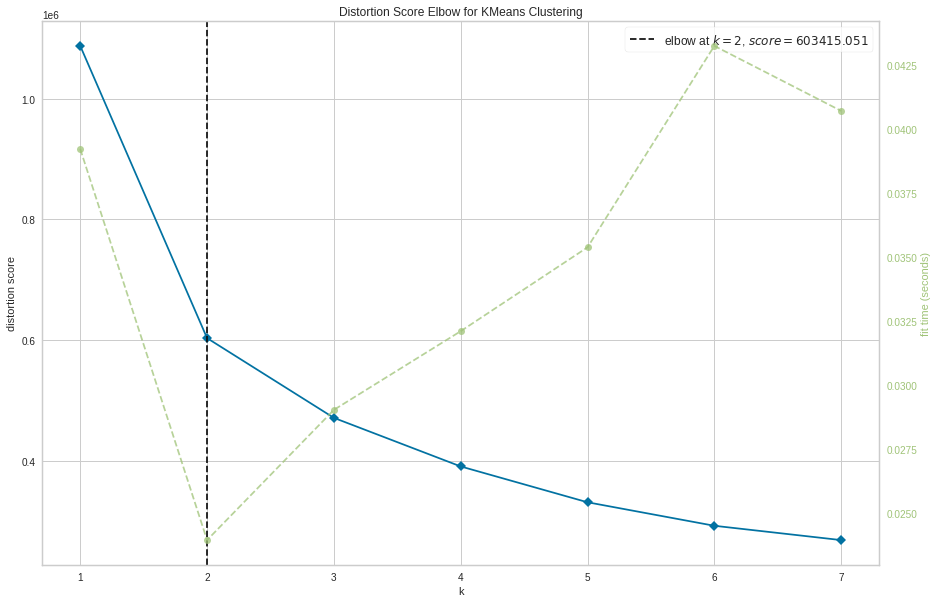

created gallery/elbow.png
The optimal value of k: 2


2

In [20]:
elbow(original)

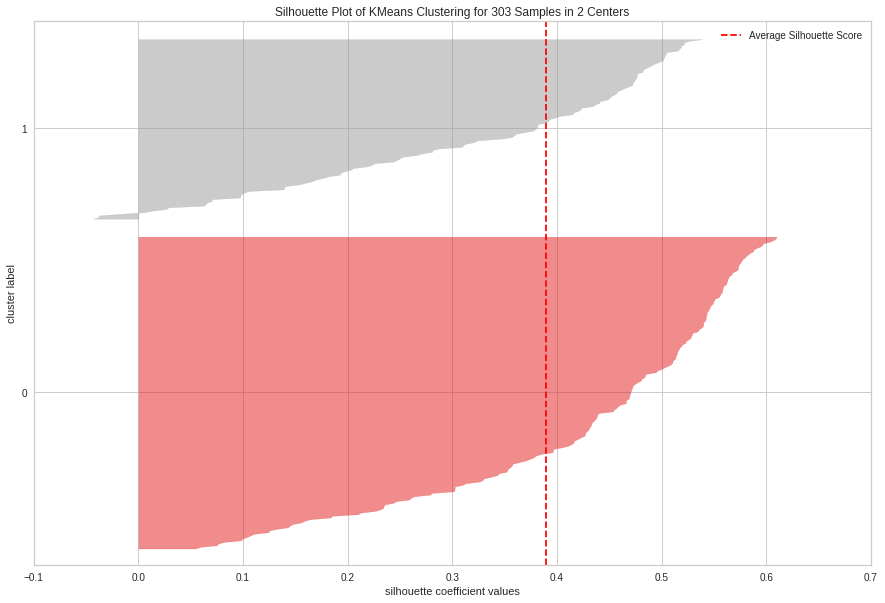

created gallery/silhouette.png


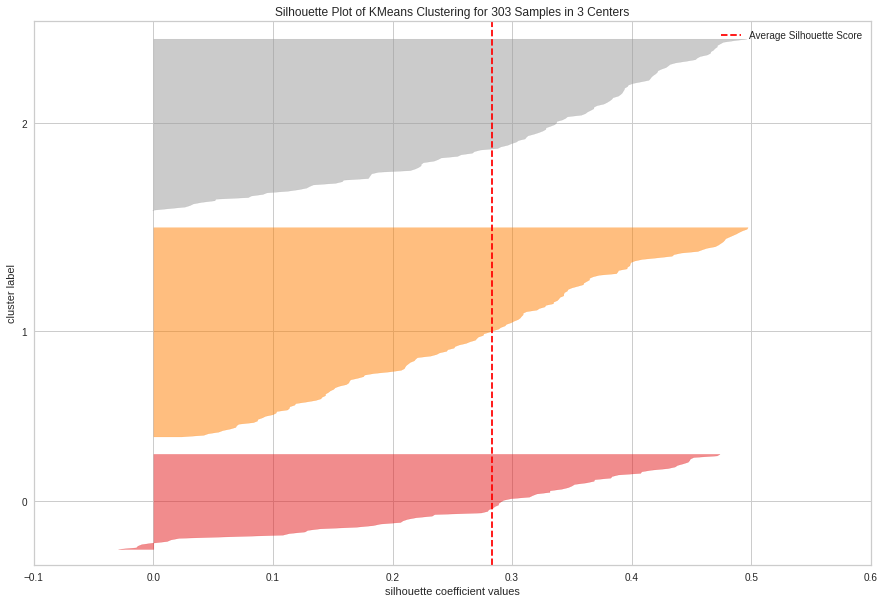

created gallery/silhouette.png


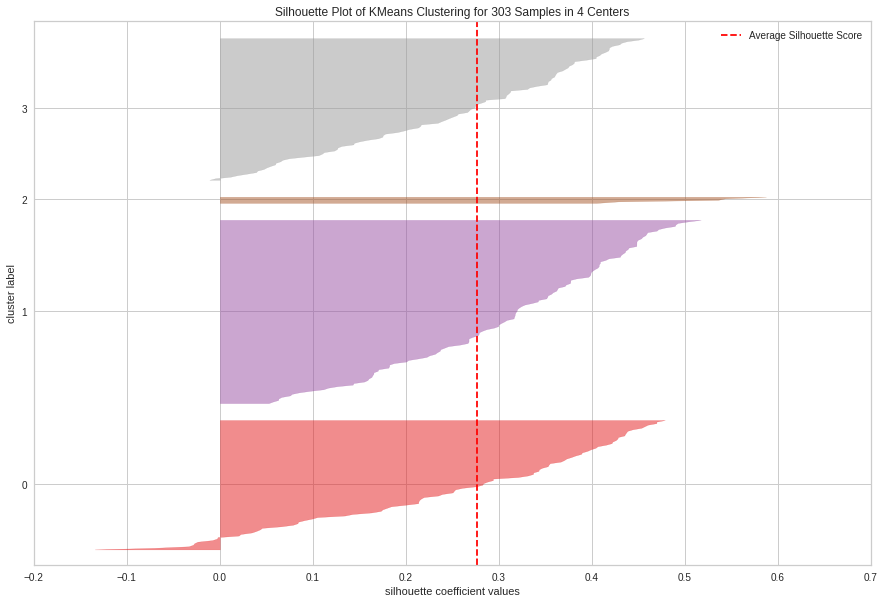

created gallery/silhouette.png


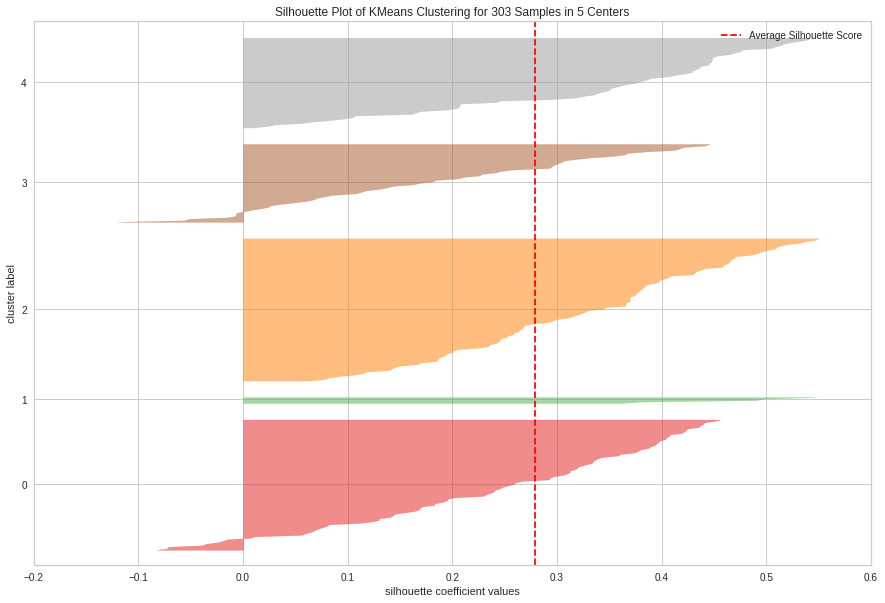

created gallery/silhouette.png


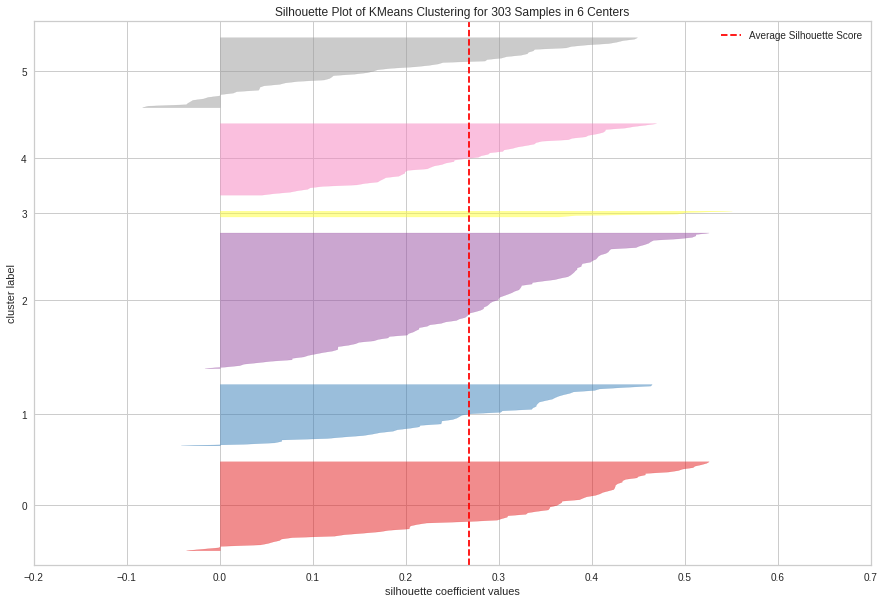

created gallery/silhouette.png


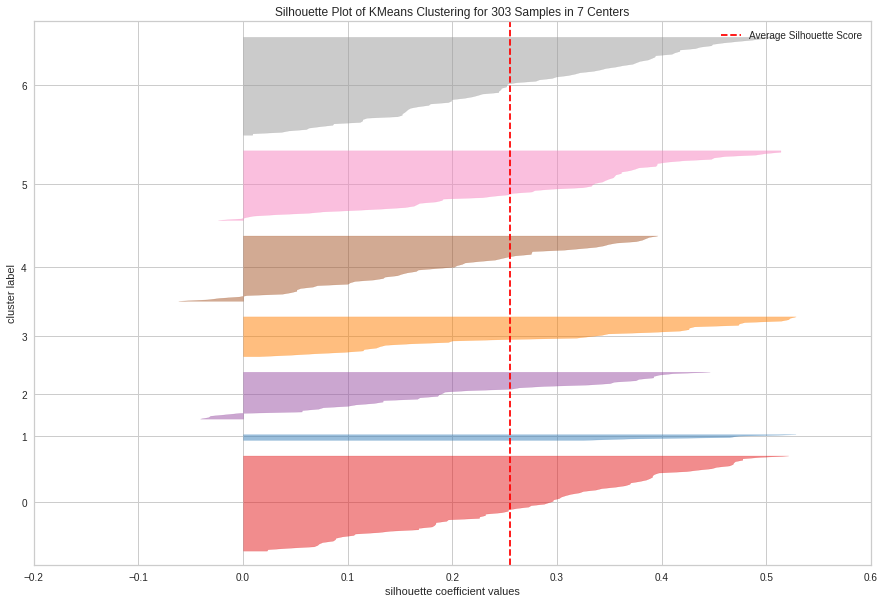

created gallery/silhouette.png


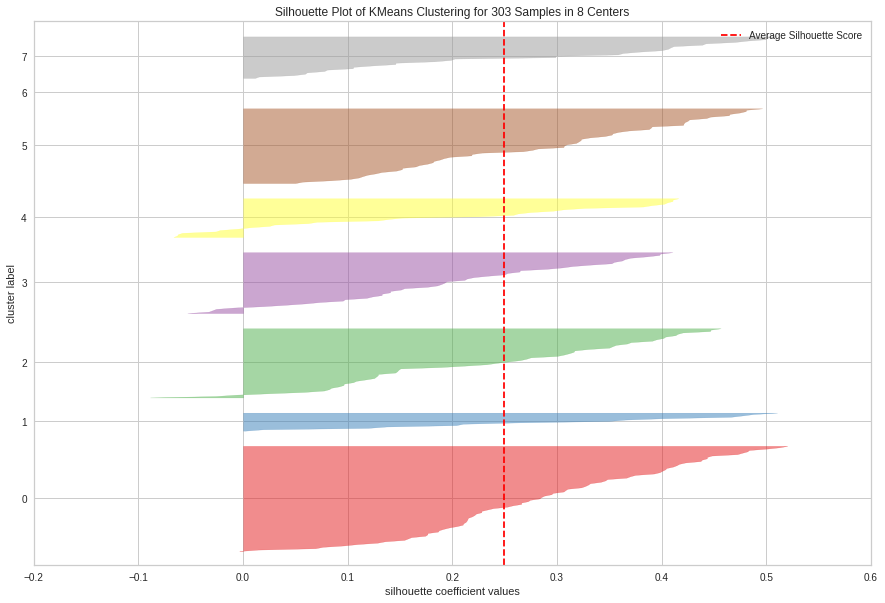

created gallery/silhouette.png


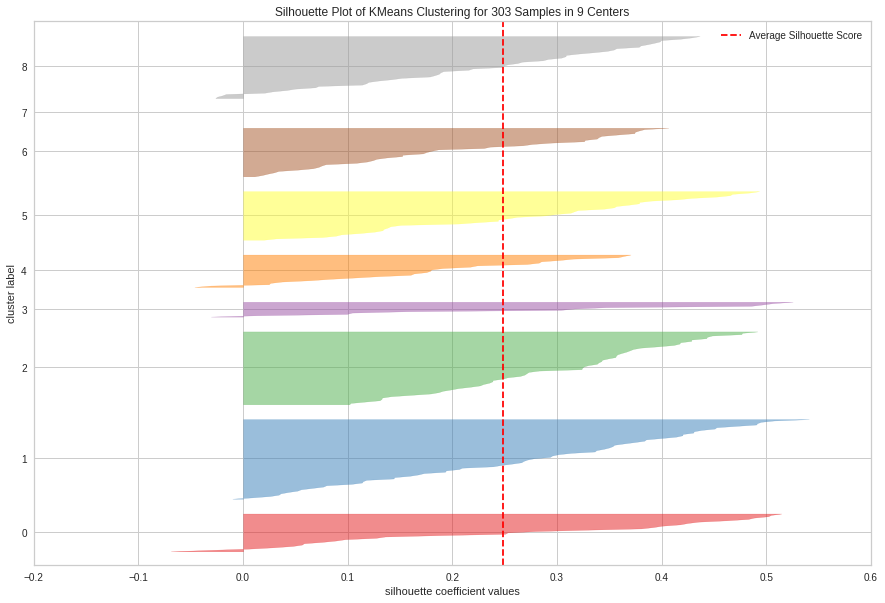

created gallery/silhouette.png


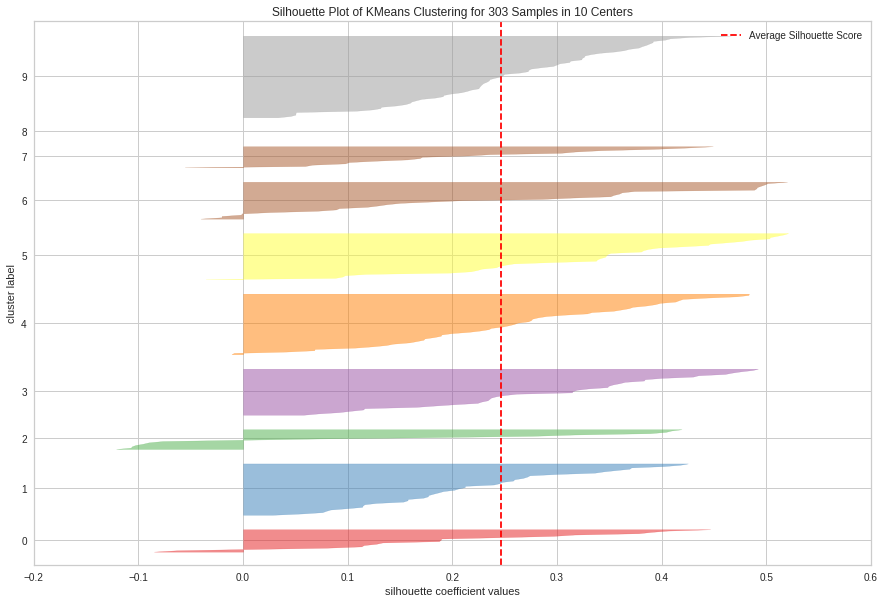

created gallery/silhouette.png


In [21]:
# graficos para escolha de k, quer se escolher o resultado em que a linha vermelha está no maior valor, pelo que entendi, mas sabe-se que são 2 grupos
for i in range(2, 11):
  silhouette(original, i)

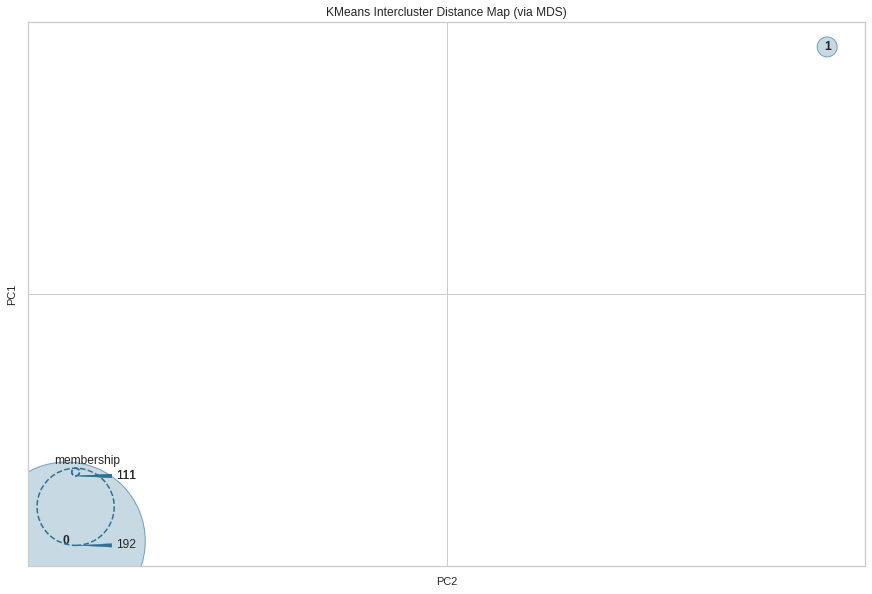

created gallery/icdm.png


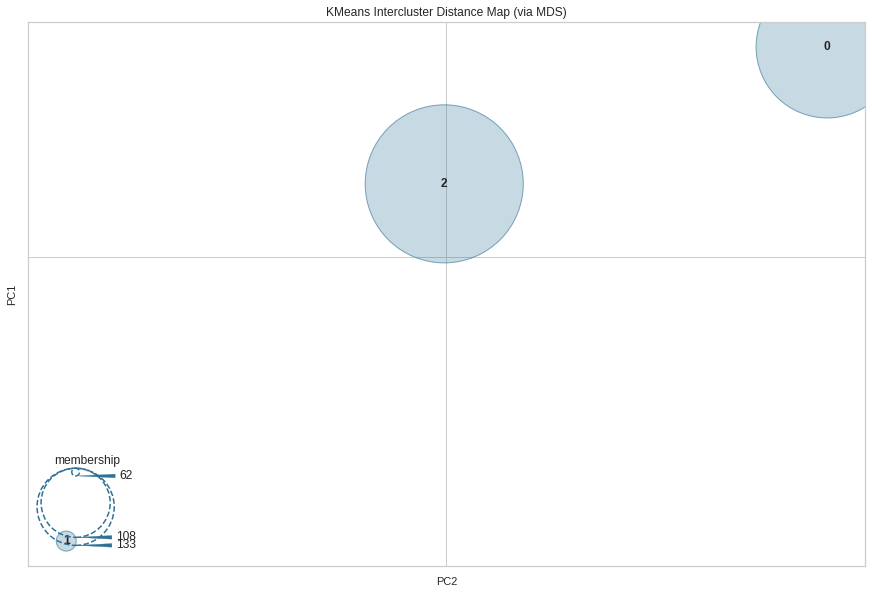

created gallery/icdm.png


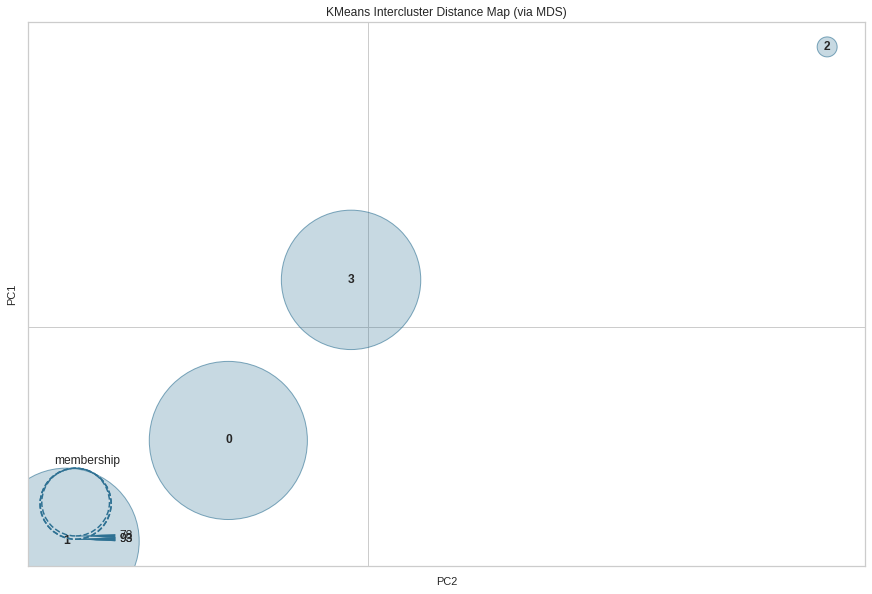

created gallery/icdm.png


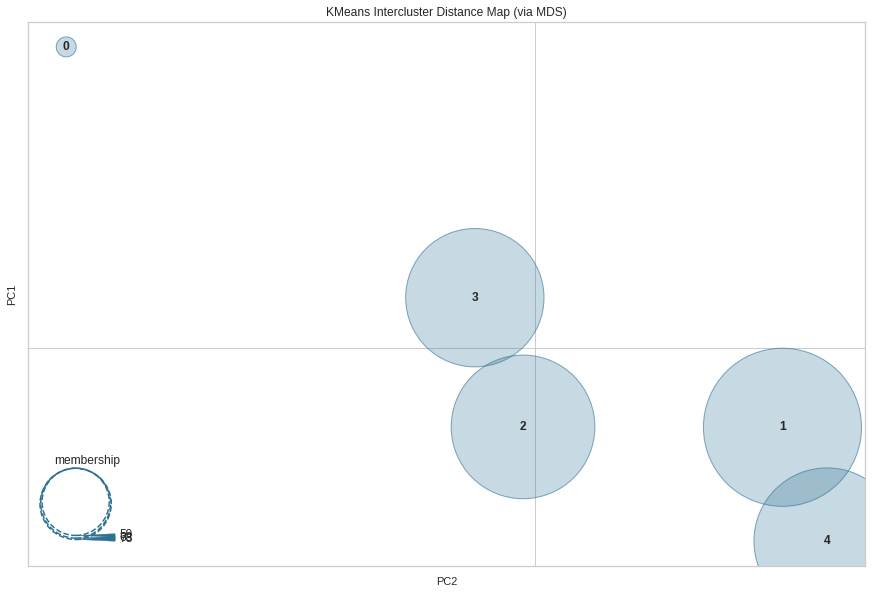

created gallery/icdm.png


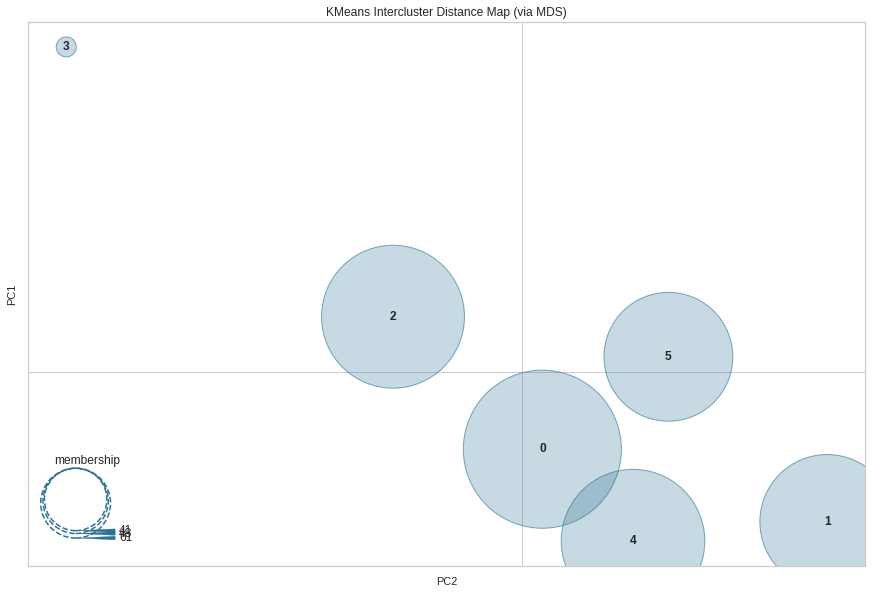

created gallery/icdm.png


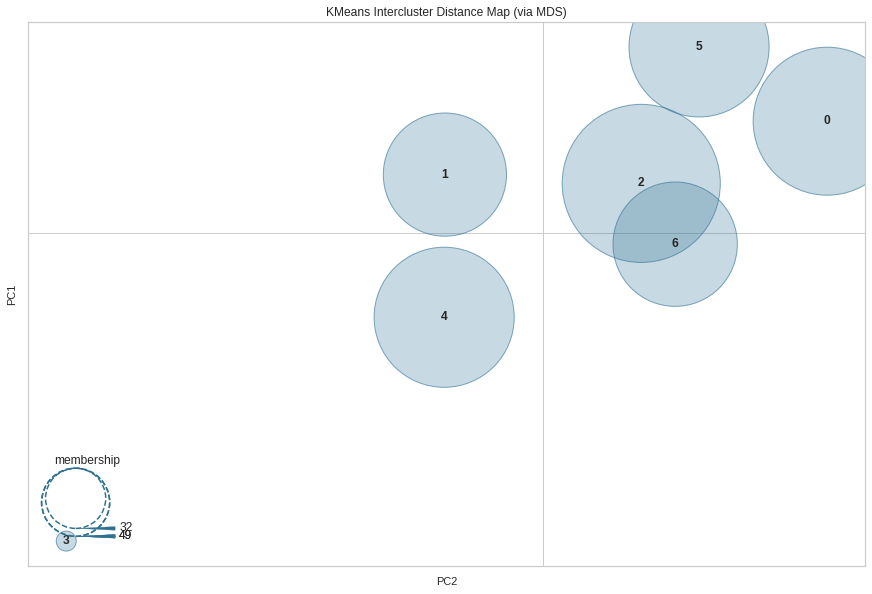

created gallery/icdm.png


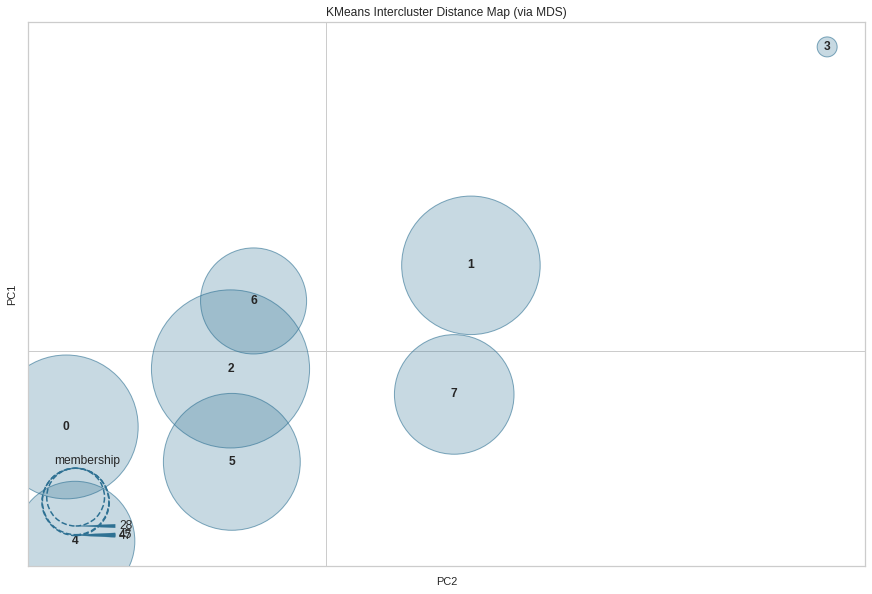

created gallery/icdm.png


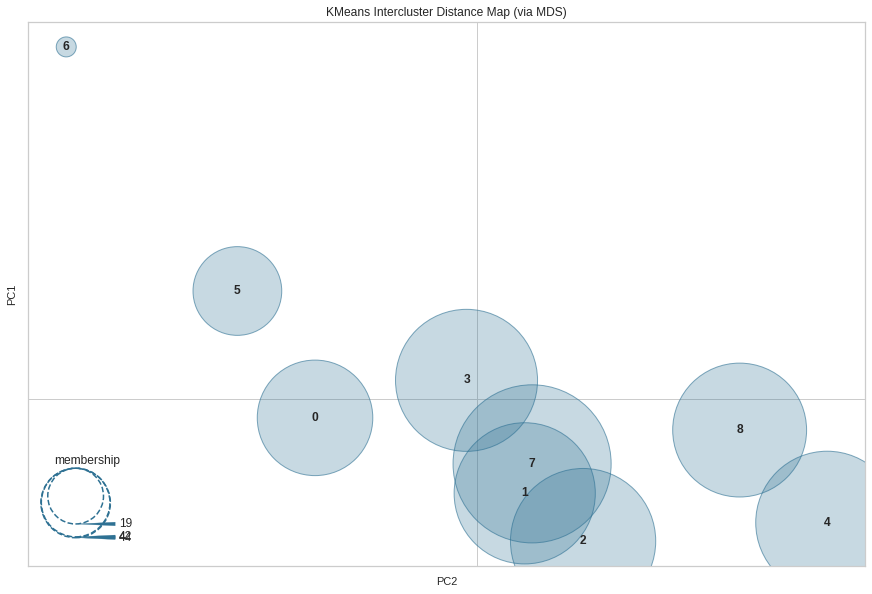

created gallery/icdm.png


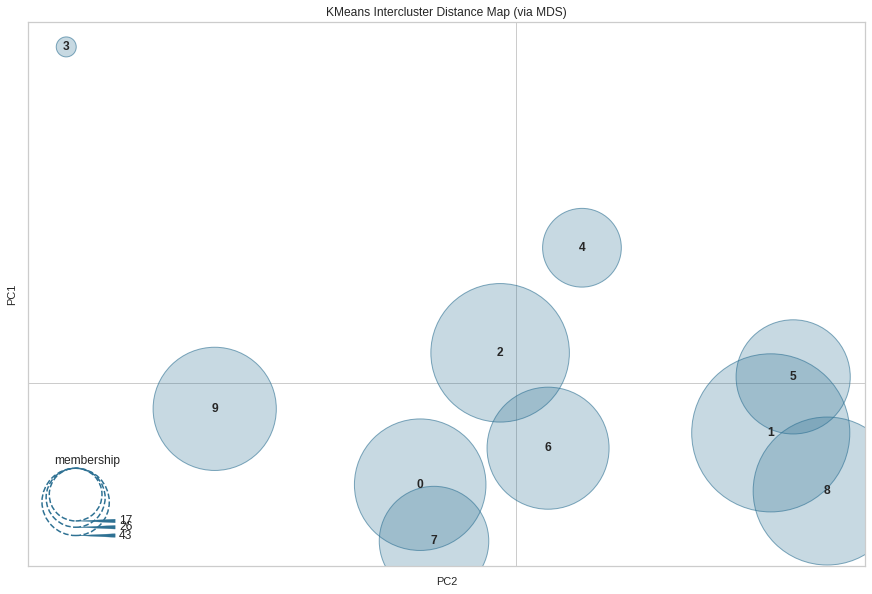

created gallery/icdm.png


In [22]:
# graficos para escolha de k
for i in range(2, 11):
  icdm(original, i)

In [23]:
# Escolhendo o modelo
kmeans = pickle.load(open('model_kmeans_2', 'rb')) # aka silhouette(original, 2)
# Computando os centróides dos clusters e prevendo os índices
y_pred_k = kmeans.labels_

In [24]:
# Conferencia simples e no olho sobre qual classe foi atribuida ao cluster da rede
print(np.array(y))
print(y_pred_k)
print(np.where(y.values == 'Yes', 1, 0))

['No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 

O algoritmo k-means é um método não supervisionado, mas como temos acesso ao labels, podemos calcular sua acurácia.

In [25]:
# montando um df com o label original, a predicao e se tal predicao foi correta
y_comp = pd.DataFrame(np.where(y.values == 'Yes', 1, 0),)
y_comp.rename(columns = {0: 'AHD'}, inplace = True)
y_comp['predict'] = y_pred_k
y_comp['gotItRight'] = np.where(y_comp.AHD != y_comp.predict, 1, 0)
y_comp.head()

,AHD,predict,gotItRight
0,0,0,0
1,1,1,0
2,1,0,1
3,0,0,0
4,0,0,0


In [26]:
# Acurácia
accuracy_kmeans = y_comp.gotItRight.mean() if y_comp.gotItRight.mean()>0.5 else  1 - y_comp.gotItRight.mean()
print(f'{(accuracy_kmeans*100):.4f}%')

57.7558%


Faça diferentes preprocessamentos e comente os resultados.

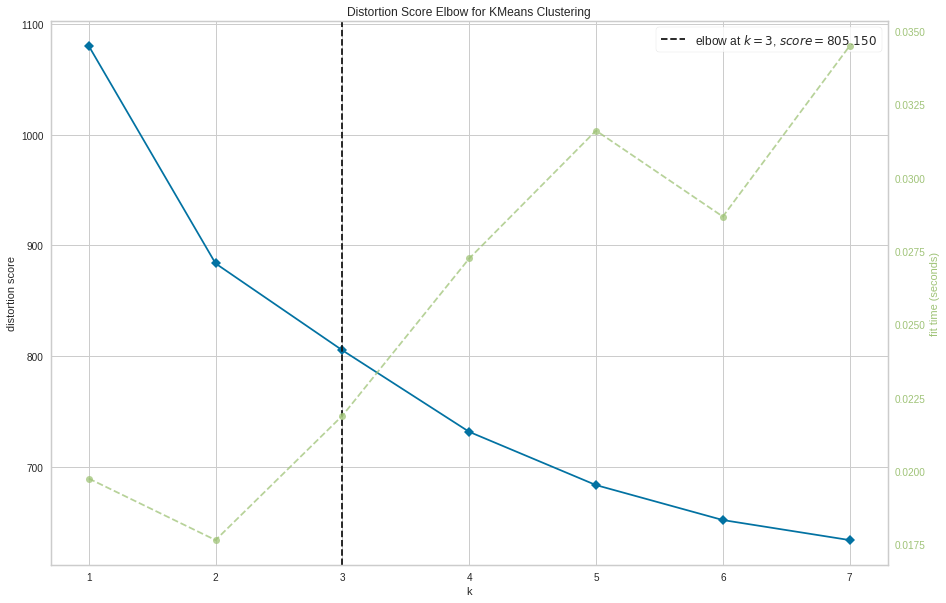

created gallery/elbow.png
The optimal value of k: 3


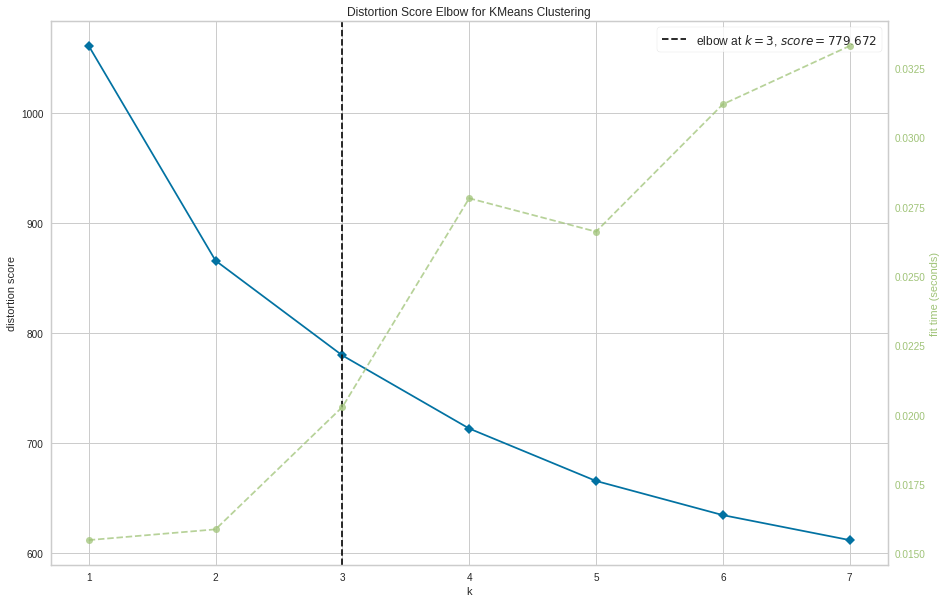

created gallery/elbow.png
The optimal value of k: 3


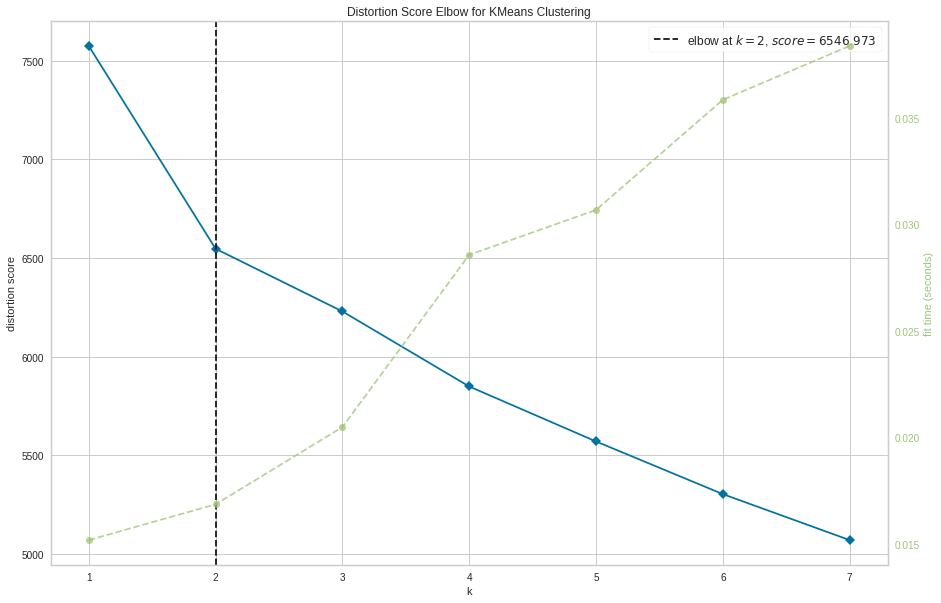

created gallery/elbow.png
The optimal value of k: 2


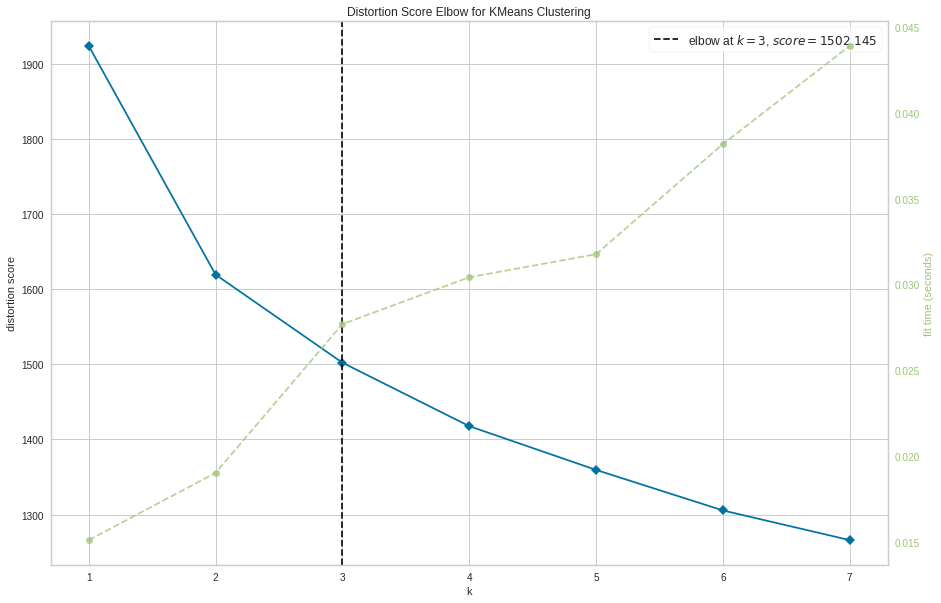

created gallery/elbow.png
The optimal value of k: 3


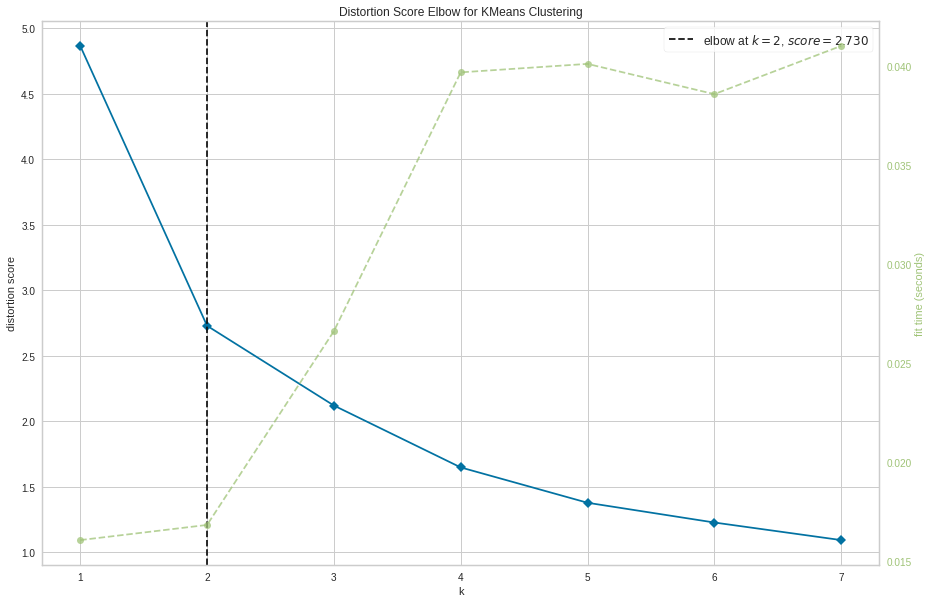

created gallery/elbow.png
The optimal value of k: 2


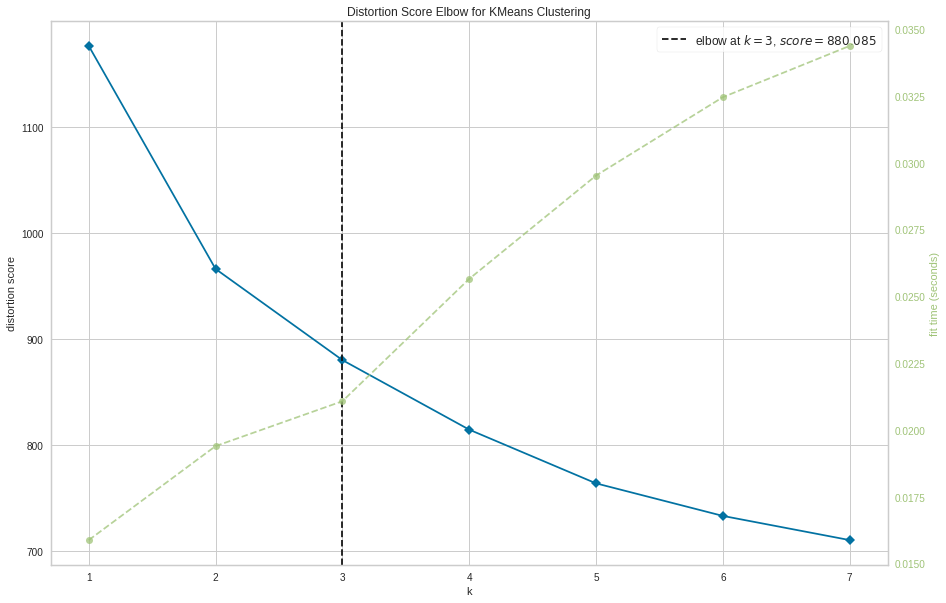

created gallery/elbow.png
The optimal value of k: 3


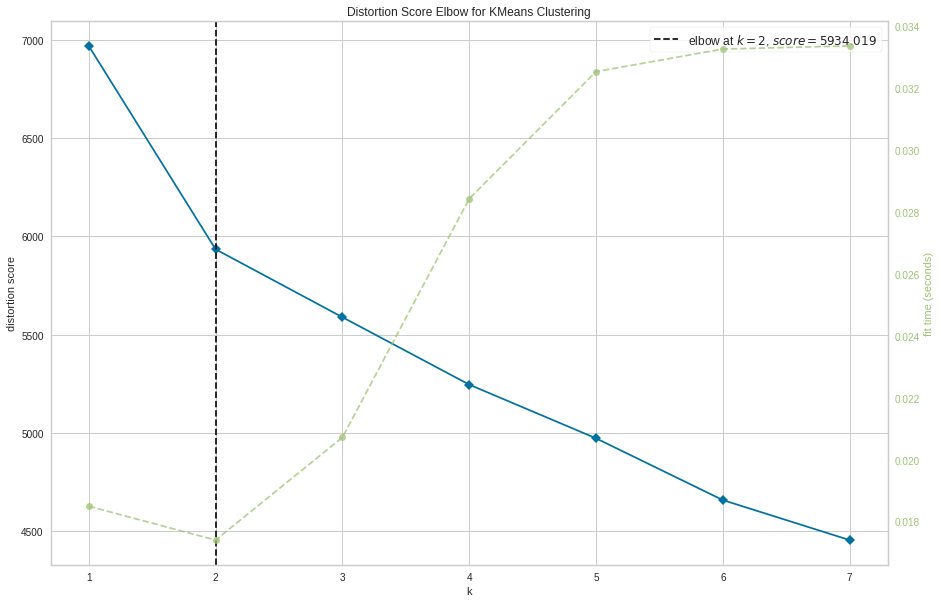

created gallery/elbow.png
The optimal value of k: 2


In [37]:
# Executando os diferentes tipos de pré-processamento, encontrando os K ideiais para cada um deles
functions = [MinMaxScaler(),MaxAbsScaler(),StandardScaler(),RobustScaler(),Normalizer(),QuantileTransformer(),PowerTransformer()]
for func in functions:
    temp = original.copy()
    func.fit(temp)
    data = func.transform(temp)
    elbow(data)

## Como podemos analisar, obtivemos os seguintes K ideiais para os pre-processamentos:

- MinMaxScaler : 3
- MaxAbsScaler : 3
- StandardScaler : 2
- RobustScaler : 3
- Normalizer : 2
- QuantileTransformer : 3
- PowerTransformer : 2

Como, apesar de estarmos trabalhando com processamento não supervisionado, temos labels para acharmos conseguirmos calcular uma acurácia caso trabalhemos com 2 clusters
desta forma, aplicando o K-Means de 2 clusters para todos esses tipos de pré-processamentos, encontramos as seguintes acurácias

In [38]:
# Executando os diferentes tipos de pré-processamento, encontrando os K ideiais para cada um deles
functions = [MinMaxScaler(),MaxAbsScaler(),StandardScaler(),RobustScaler(),Normalizer(),QuantileTransformer(),PowerTransformer()]
for func in functions:
    temp = original.copy()
    func.fit(temp)
    data = func.transform(temp)
    kmeans = KMeans(2)
    kmeans.fit(data)
    y_pred_k = kmeans.labels_
    y_comp = pd.DataFrame(np.where(y.values == 'Yes', 1, 0),)
    y_comp.rename(columns = {0: 'AHD'}, inplace = True)
    y_comp['predict'] = y_pred_k
    y_comp['gotItRight'] = np.where(y_comp.AHD != y_comp.predict, 1, 0)
    accuracy_kmeans = y_comp.gotItRight.mean() if y_comp.gotItRight.mean()>0.5 else  1 - y_comp.gotItRight.mean()
    print(f'{(accuracy_kmeans*100):.4f}%')

82.5083%
82.1782%
81.8482%
79.5380%
60.3960%
82.8383%
80.8581%
